In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns


## Loading a dataset
[Dataset: House Sales in King County, USA](https://www.kaggle.com/datasets/harlfoxem/housesalesprediction)

In [2]:
house_data = pd.read_csv('data/kc_house_data.csv',parse_dates=[1])

house_data

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,2014-05-21,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,2015-02-23,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,2014-06-23,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,2015-01-16,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [3]:
# zero seems to be a placeholder for missing data in some columns
house_data.apply(lambda _: _.isin([0]).sum(), axis=0)

id                   0
date                 0
price                0
bedrooms            13
bathrooms           10
sqft_living          0
sqft_lot             0
floors               0
waterfront       21450
view             19489
condition            0
grade                0
sqft_above           0
sqft_basement    13126
yr_built             0
yr_renovated     20699
zipcode              0
lat                  0
long                 0
sqft_living15        0
sqft_lot15           0
dtype: int64

In [4]:
# in the columns, where it makes sense, replacing 0 with NaN
for columns in ['bedrooms', 'bathrooms']:
    house_data.loc[:,columns] = (
        house_data.loc[:,columns]
        .replace(0, np.NaN))

In [5]:
# replace yr_renovated=0 with yr_built value
not_renovated = house_data.yr_renovated == 0
house_data.loc[not_renovated,'yr_renovated'] =(
    house_data.loc[not_renovated, 'yr_built']
)

In [6]:
# drop rows with NA
house_data = house_data.dropna(axis=0, how='any')

In [8]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  float64       
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  int64         
 9   view           21597 non-null  int64         
 10  condition      21597 non-null  int64         
 11  grade          21597 non-null  int64         
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int64         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   2159

## Exploring features

In [9]:
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402029e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007547,0.234292,3.409825,7.657915,1788.596842,291.725008,1970.999676,1973.382322,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.671337e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086549,0.766390,0.650546,1.173200,827.759761,442.667800,29.375234,28.808668,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,1954.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,1977.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,1999.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


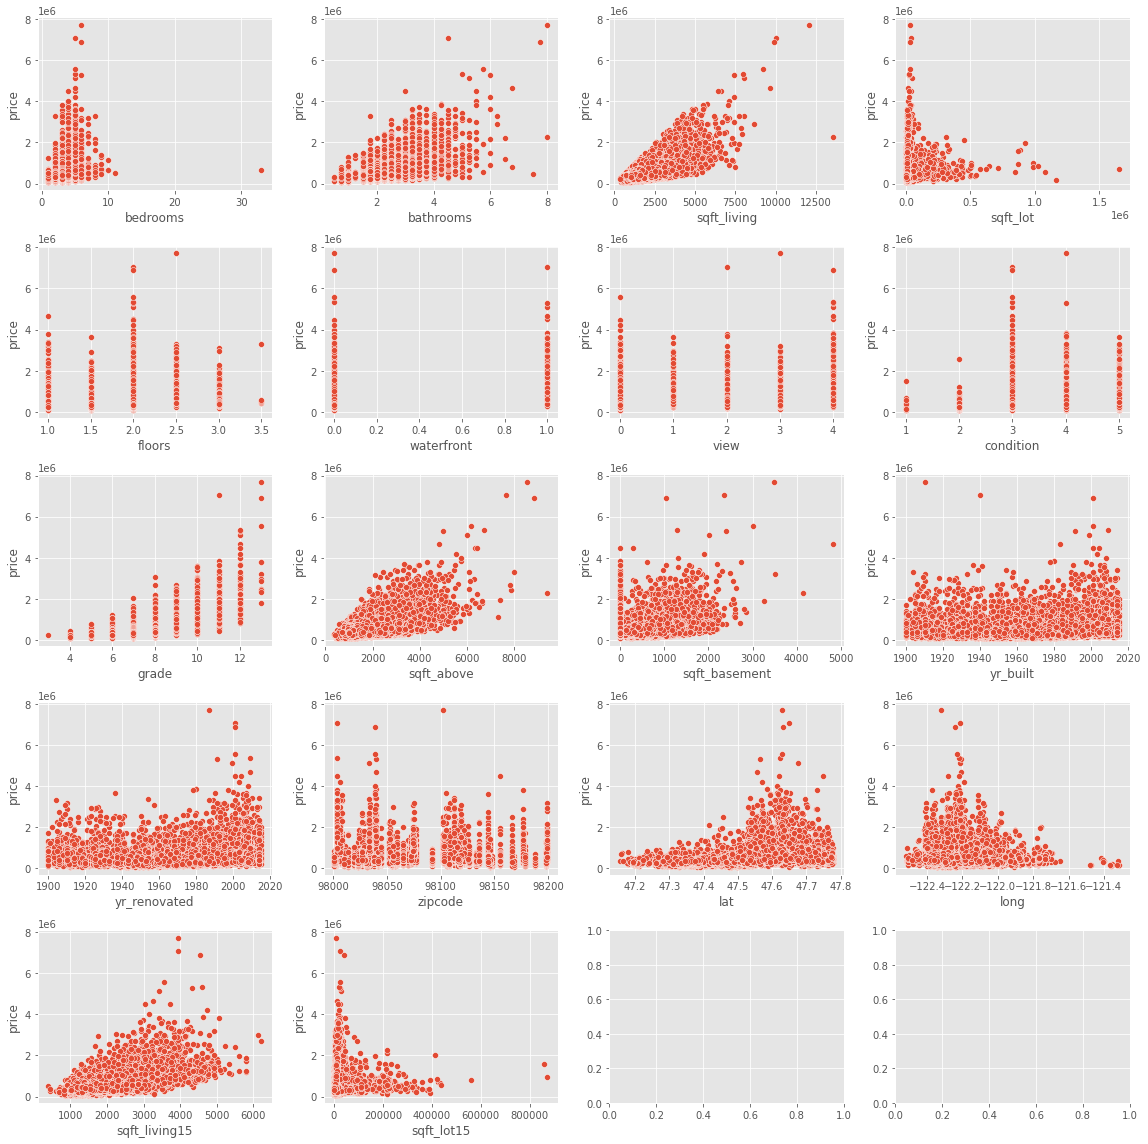

In [10]:
fig, axs = plt.subplots(5, 4, figsize=(16,16))
axs = axs.ravel()
_data=house_data.drop(columns=['id', 'date'])
for i, col in enumerate(_data.drop(columns=['price'])):
    sns.scatterplot(data=_data, x=col,y='price', ax=axs[i])
plt.tight_layout()

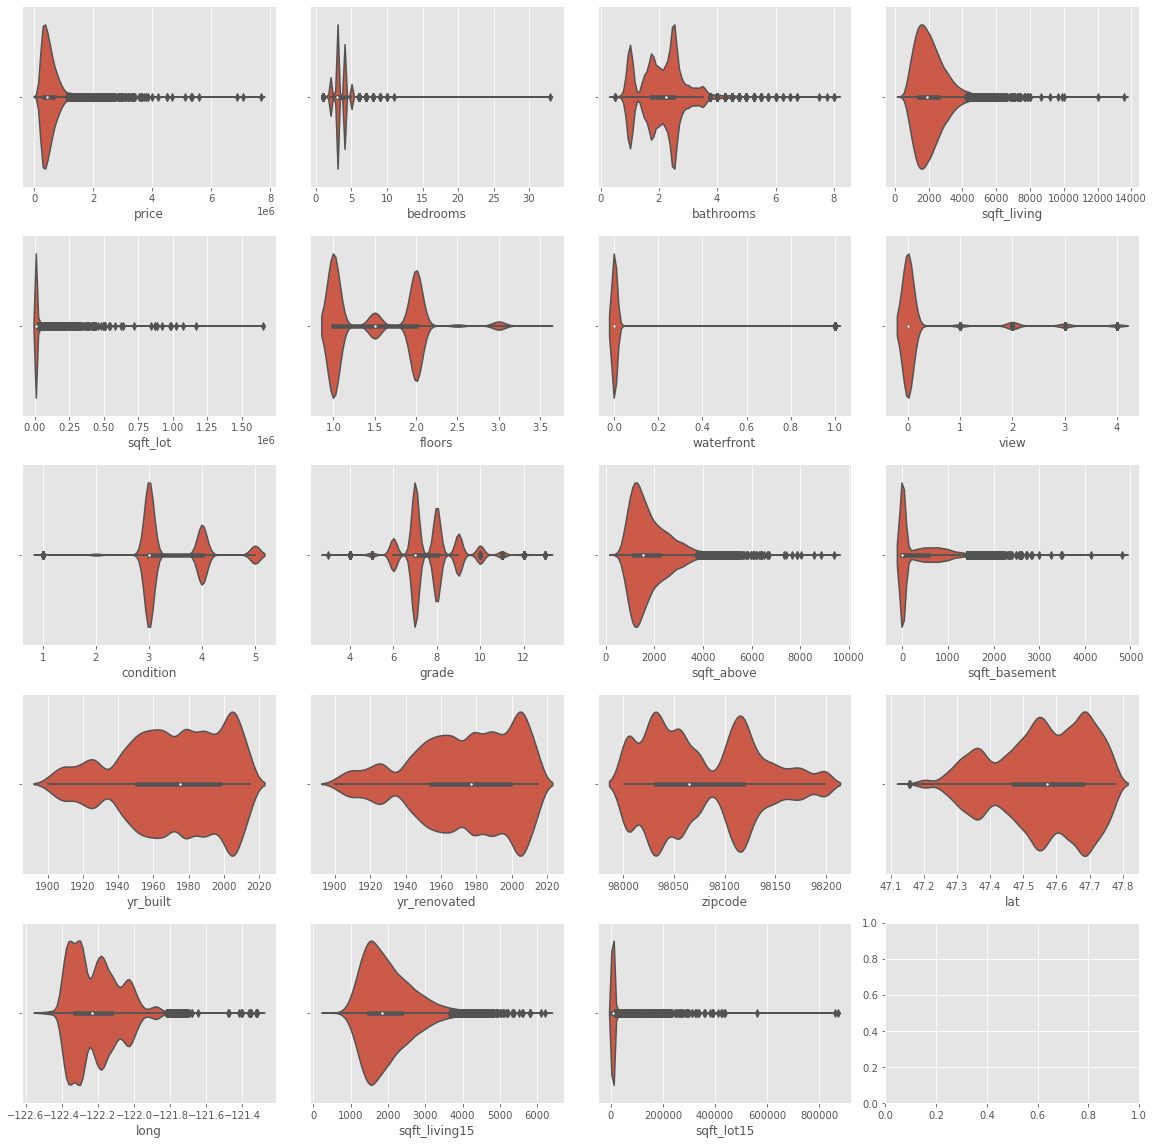

In [11]:
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
df = house_data.drop(columns=['id', 'date'])
for i, col in enumerate(df):
    sns.violinplot(data=df, x=col, ax=axs[i])
    sns.boxplot(data=df, x=col, ax=axs[i], width=0)
plt.tight_layout()

## Robust scaler

In [12]:
from sklearn.preprocessing import RobustScaler


tranformer = RobustScaler()
data = house_data.drop(columns=['id', 'date'])
data_transf = tranformer.fit_transform(data)
data_transf = pd.DataFrame(data=data_transf, columns=data.columns)

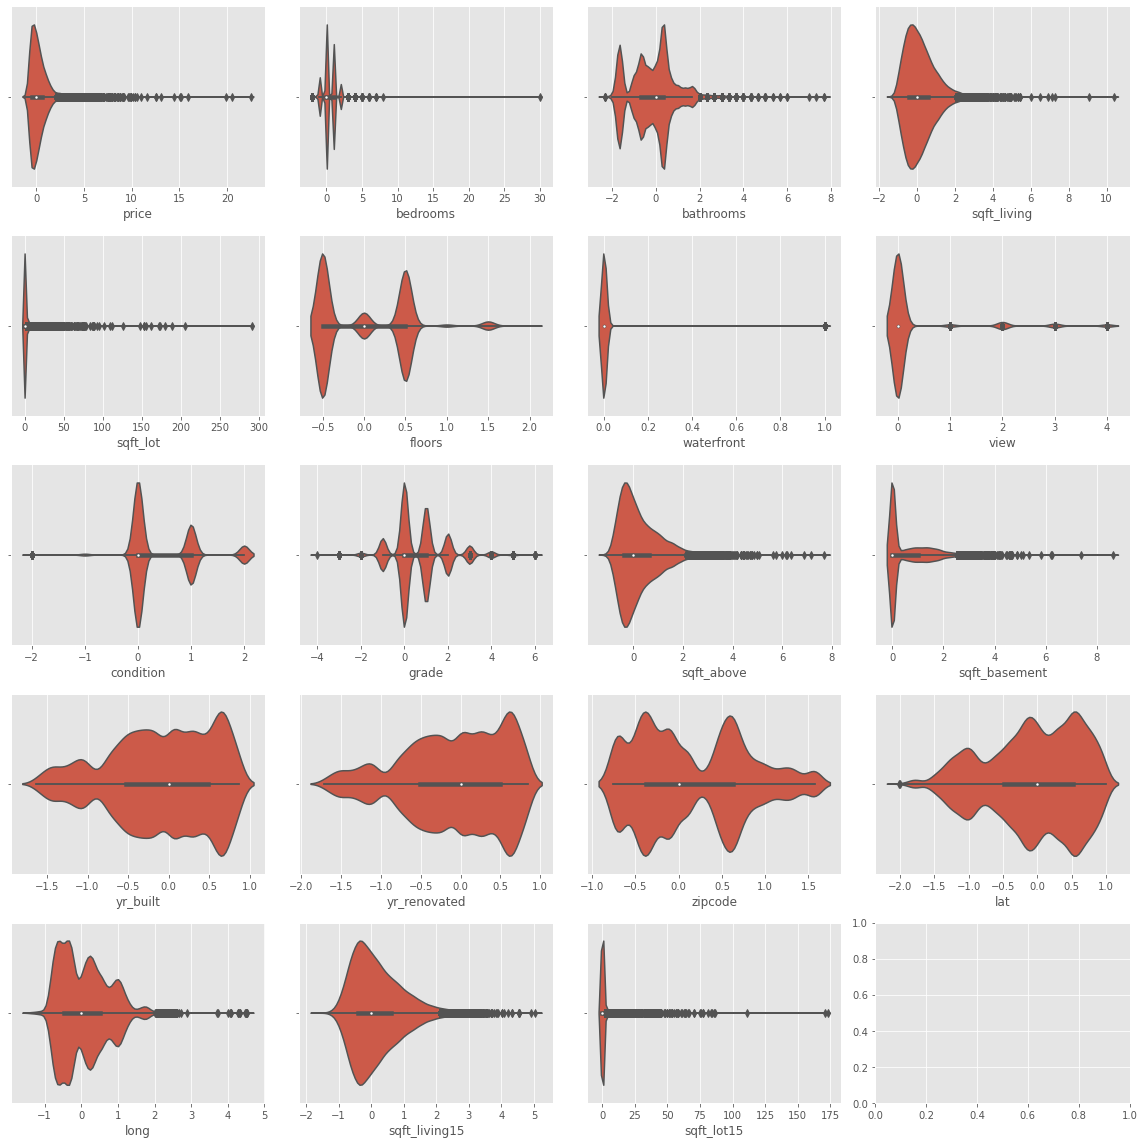

In [13]:
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
for i, col in enumerate(data_transf):
    sns.violinplot(data=data_transf, x=col, ax=axs[i])
    sns.boxplot(data=data_transf, x=col, ax=axs[i], width=0)
plt.tight_layout()

## Quantile Transformer

In [14]:
from sklearn.preprocessing import QuantileTransformer

tranformer = QuantileTransformer(output_distribution='normal')
data = house_data.drop(columns=['id', 'date'])
data_transf = tranformer.fit_transform(data)
data_transf = pd.DataFrame(data=data_transf, columns=data.columns)


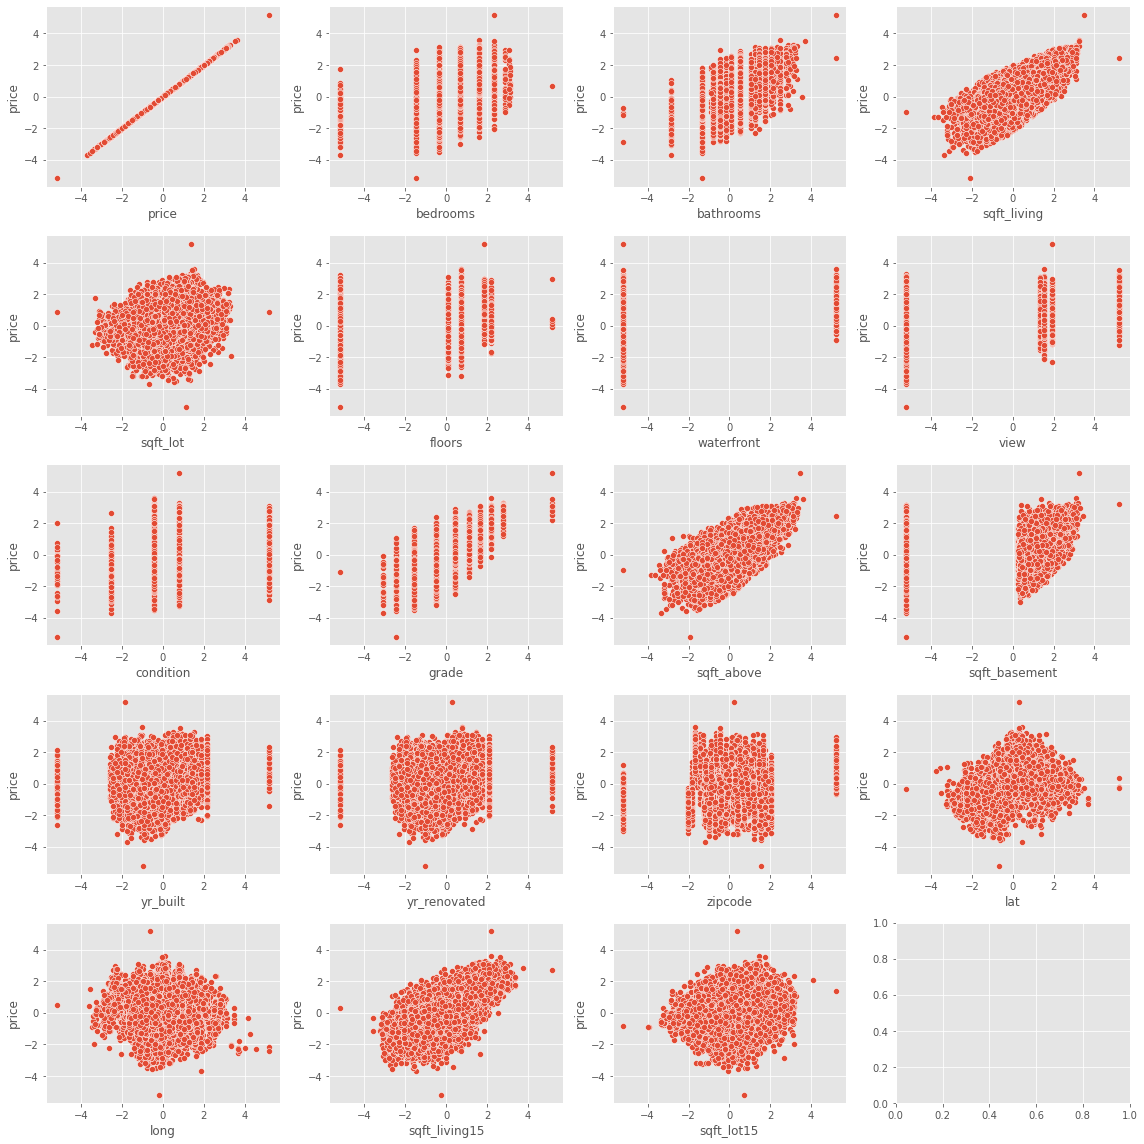

In [15]:
# sns.pairplot(data=data_transf, y_vars=['price'])
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
for i, col in enumerate(data_transf):
    sns.scatterplot(data=data_transf, x=col,y='price', ax=axs[i])
plt.tight_layout()

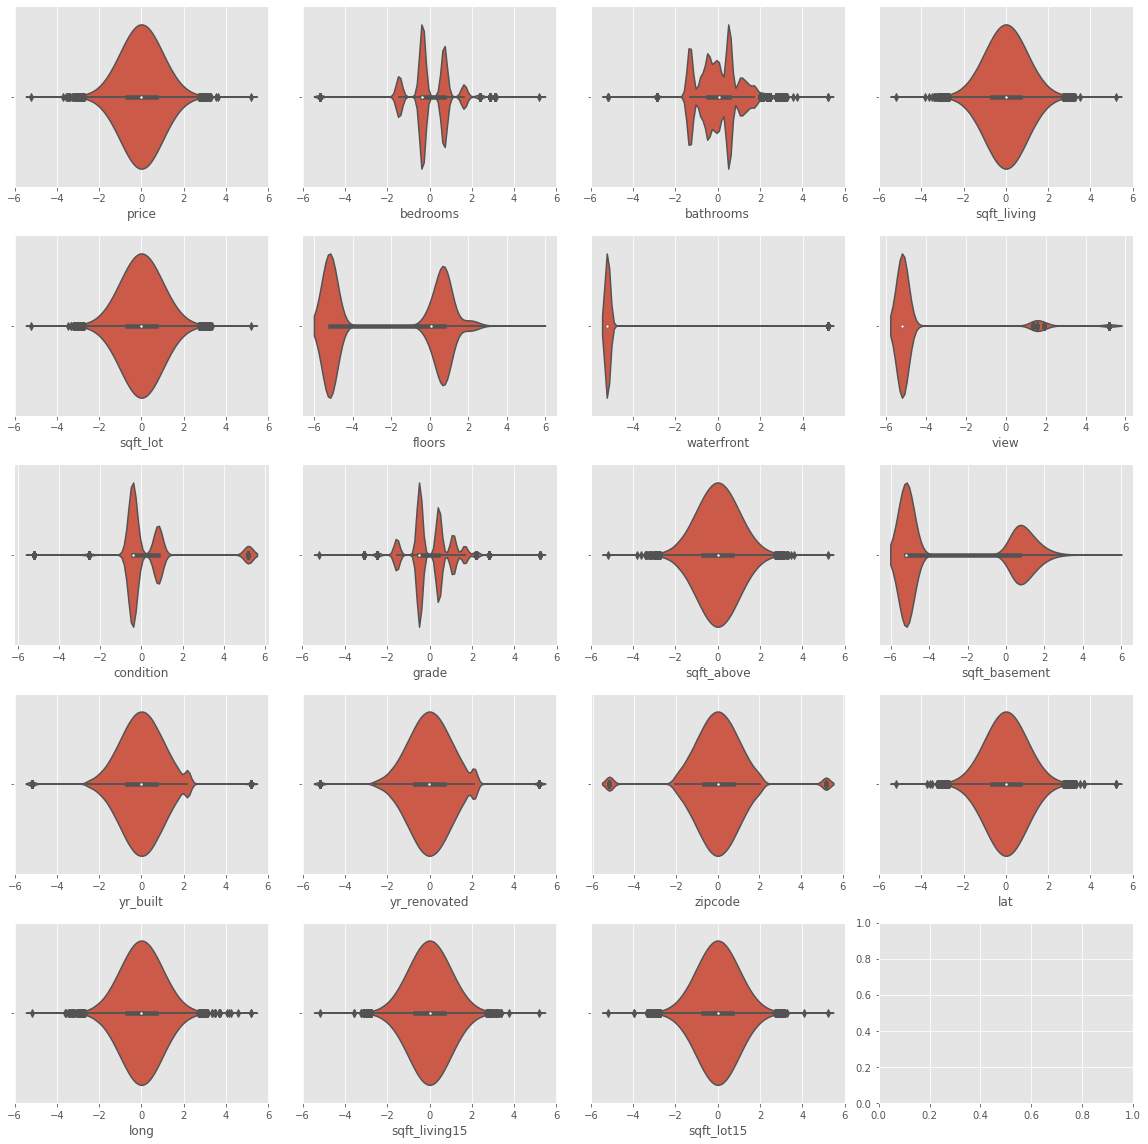

In [16]:
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
for i, col in enumerate(data_transf):
    sns.violinplot(data=data_transf, x=col, ax=axs[i])
    sns.boxplot(data=data_transf, x=col, ax=axs[i], width=0)
plt.tight_layout()

## Power transformer (box-cox or yeo-johnson)

In [17]:
from sklearn.preprocessing import  PowerTransformer

tranformer = PowerTransformer()
data = house_data.drop(columns=['id', 'date'])
data_transf = tranformer.fit_transform(data)
data_transf = pd.DataFrame(data=data_transf, columns=data.columns)

C:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\preprocessing\_data.py:3211: RuntimeWarning: overflow encountered in power
  out[pos] = (np.power(x[pos] + 1, lmbda) - 1) / lmbda
C:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\numpy\core\_methods.py:235: RuntimeWarning: overflow encountered in multiply
  x = um.multiply(x, x, out=x)
C:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\sklearn\preprocessing\_data.py:3215: RuntimeWarning: overflow encountered in power
  out[~pos] = -(np.power(-x[~pos] + 1, 2 - lmbda) - 1) / (2 - lmbda)
C:\Users\tdrumond\Miniconda3\envs\ml-latest\lib\site-packages\numpy\core\_methods.py:246: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(x, axis, dtype, out, keepdims=keepdims, where=where)


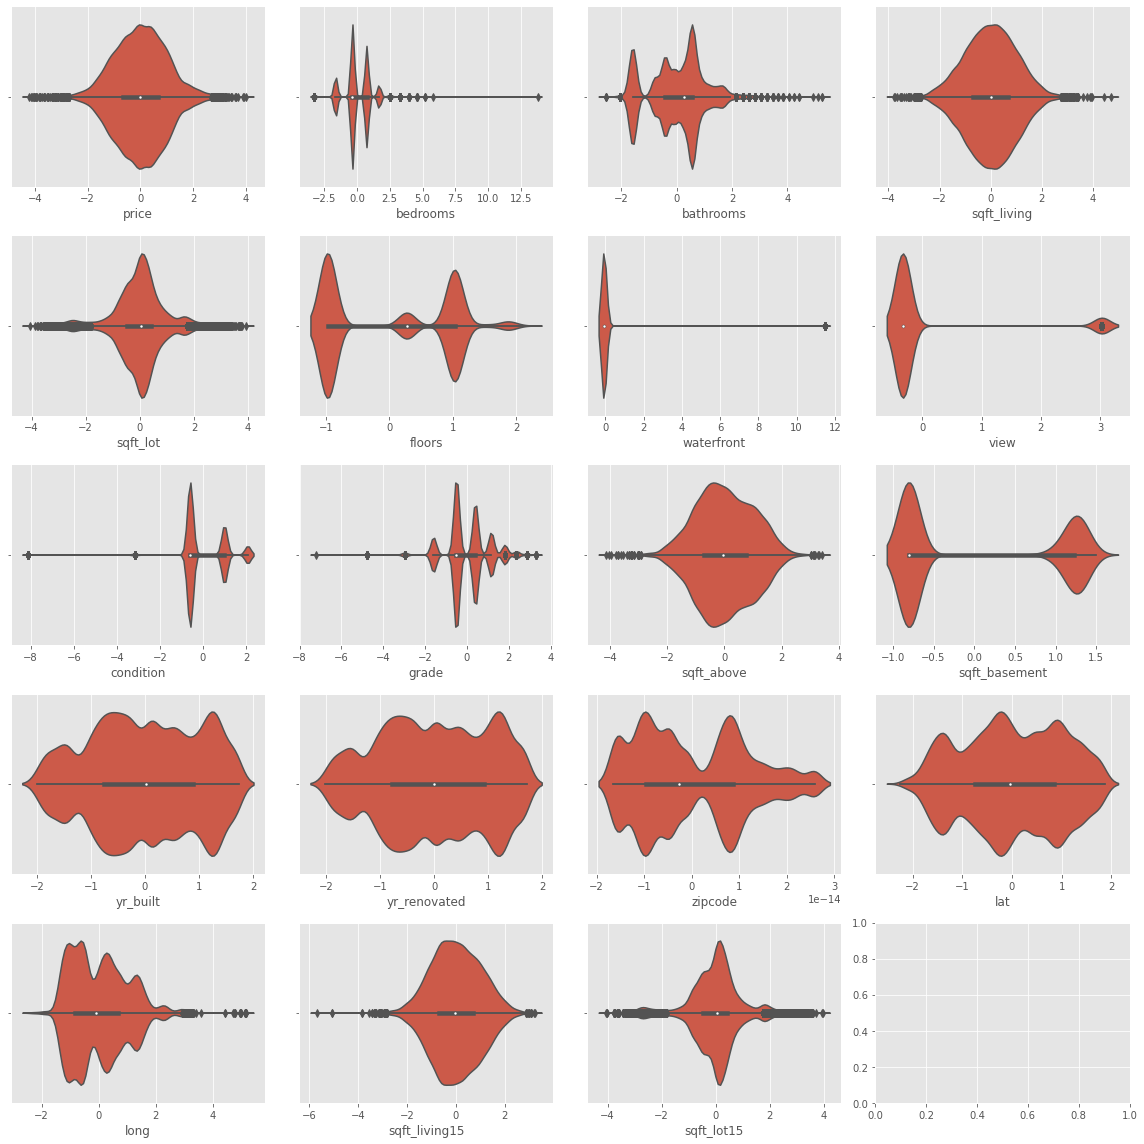

In [18]:
fig, axs = plt.subplots(5,4,figsize=(16,16))
axs = axs.ravel()
for i, col in enumerate(data_transf):
    sns.violinplot(data=data_transf, x=col, ax=axs[i])
    sns.boxplot(data=data_transf, x=col, ax=axs[i], width=0)
plt.tight_layout()